In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('stock.xlsx')

In [4]:
df

,代码,简称,时间,开盘价(元),收盘价(元),最高价(元),最低价(元),涨跌(元),涨跌幅(%),前收盘价(元),...,PS市销率,PCF市现率,总市值(元),市盈率TTM,ST股票,*ST股票,交易状态,内盘成交量,外盘成交量,DDX
0,000001.SZ,平安银行,2021-05-14,23.14,23.32,23.43,22.60,0.43,1.8785,22.89,...,2.9474,-28.0024,4.525460e+11,14.8317,否,否,正常交易,24689434,31689102,-0.0263
1,000001.SZ,平安银行,2021-05-17,23.15,23.60,23.82,22.95,0.28,1.2007,23.32,...,2.9828,-28.3386,4.579797e+11,15.0098,否,否,正常交易,24422373,28334092,-0.0148
2,000001.SZ,平安银行,2021-05-18,23.85,23.90,24.11,23.40,0.3,1.2712,23.60,...,3.0207,-28.6988,4.638014e+11,15.2006,否,否,正常交易,15863806,23677692,0.0095
3,000001.SZ,平安银行,2021-05-19,23.82,23.60,24.13,23.52,-0.3,-1.2552,23.90,...,2.9828,-28.3386,4.579797e+11,15.0098,否,否,正常交易,22745376,20196657,-0.0012
4,000001.SZ,平安银行,2021-05-20,23.41,23.82,23.84,23.27,0.22,0.9322,23.60,...,3.0106,-28.6027,4.622490e+11,15.1497,否,否,正常交易,18570663,22008174,0.0109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24195,000503.SZ,国新健康,2022-05-09,8.71,8.70,9.23,8.41,0.09,1.0453,8.61,...,31.2566,-75.2974,7.892772e+09,-46.7074,否,否,正常交易,23266363,22748307,0.2440
24196,000503.SZ,国新健康,2022-05-10,8.50,8.68,8.85,8.35,-0.02,-0.2299,8.70,...,31.1848,-75.1243,7.874628e+09,-46.6000,否,否,正常交易,14300367,11886123,0.1518
24197,000503.SZ,国新健康,2022-05-11,8.75,8.65,8.93,8.63,-0.03,-0.3456,8.68,...,31.0770,-74.8646,7.847412e+09,-46.4389,否,否,正常交易,10551197,9001736,-0.1674
24198,000503.SZ,国新健康,2022-05-12,8.50,8.65,8.82,8.50,0,0,8.65,...,31.0770,-74.8646,7.847412e+09,-46.4389,否,否,正常交易,6172022,6273339,-0.1755


In [5]:
df = pd.DataFrame({
    'date': df['时间'],
    'code': df['代码'],
    'price': df['收盘价(元)'],
    'price_before': df['前收盘价(元)']
})

In [6]:
df.loc

In [7]:
df['standard'] = 1 + (df['price'] - df['price_before']) / df['price_before']

In [8]:
df['standard'].cumprod()

0        1.018785
1        1.031018
2        1.044124
3        1.031018
4        1.040629
           ...   
24195    0.000015
24196    0.000015
24197    0.000015
24198    0.000015
24199    0.000015
Name: standard, Length: 24200, dtype: float64

In [9]:
df

,date,code,price,price_before,standard
0,2021-05-14,000001.SZ,23.32,22.89,1.018785
1,2021-05-17,000001.SZ,23.60,23.32,1.012007
2,2021-05-18,000001.SZ,23.90,23.60,1.012712
3,2021-05-19,000001.SZ,23.60,23.90,0.987448
4,2021-05-20,000001.SZ,23.82,23.60,1.009322
...,...,...,...,...,...
24195,2022-05-09,000503.SZ,8.70,8.61,1.010453
24196,2022-05-10,000503.SZ,8.68,8.70,0.997701
24197,2022-05-11,000503.SZ,8.65,8.68,0.996544
24198,2022-05-12,000503.SZ,8.65,8.65,1.000000


In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
x = df.pivot_table(index='date',columns='code',values='standard')

In [14]:
x

code,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,000425.SZ,000426.SZ,000428.SZ,000429.SZ,000430.SZ,000488.SZ,000498.SZ,000501.SZ,000502.SZ,000503.SZ
date,,,,,,,,,,,,,,,,,,,,,
2021-05-14,1.018785,1.007068,1.021220,1.005076,1.016760,1.024259,1.000000,1.010183,1.009877,1.017685,...,1.008463,0.985469,1.009967,0.975610,0.990689,0.982326,1.013944,1.033421,1.007366,1.005848
2021-05-17,1.012007,1.001847,1.007792,0.949495,0.985348,0.952632,0.986957,0.992944,0.973105,0.981833,...,1.000000,1.012064,0.973684,1.001389,0.966165,1.019886,0.984283,0.979574,0.967093,0.986047
2021-05-18,1.012712,1.006268,0.987758,0.968085,1.007435,0.977901,1.000000,1.010152,0.997487,1.012872,...,0.994406,1.027815,1.020270,0.998613,1.013619,1.001857,1.000000,0.992181,0.984877,1.037736
2021-05-19,0.987448,0.980945,0.987606,1.000000,0.988930,1.008475,0.995595,1.028141,1.007557,0.981732,...,0.991561,0.976804,0.993377,1.001389,0.988484,0.976830,0.994012,0.983363,0.998081,0.972727
2021-05-20,1.009322,1.007471,0.996697,0.950549,0.986940,1.008403,0.995575,0.956989,1.007500,0.963592,...,0.977305,0.965699,1.016667,0.993065,0.982524,0.941176,0.989960,0.999110,0.978846,0.996495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-09,0.972594,0.999459,0.949791,1.052326,1.027295,1.019727,1.018100,1.012195,1.099644,1.008865,...,1.000000,1.034036,1.012739,1.005135,1.019531,1.099206,1.050454,1.023185,1.000000,1.010453
2022-05-10,1.002749,1.004329,0.949780,1.005525,1.004831,1.016369,1.031111,1.046002,1.016181,1.003515,...,1.010225,1.000000,1.047170,1.002554,1.007663,1.014440,1.036503,1.001970,1.000000,0.997701
2022-05-11,1.002742,0.994612,0.949907,0.989011,0.987981,0.995608,0.982759,1.076440,0.958599,0.992995,...,0.997976,0.981191,1.015015,0.993631,1.019011,0.996441,0.967563,1.002950,1.000000,0.996544


In [15]:
# x.plot(subplots=True,layout=(10,10),figsize=(25,25),use_index=False,sharex=True,sharey=True,title='累计收益率')

In [16]:
y = list(x.columns)

In [17]:
len(x)

242

In [18]:
sum((x['000001.SZ']-x['000002.SZ'])**2)

0.1408303803176043

In [19]:
num = []
cum = []
for i in range(len(y)):
    for j in range(i+1, len(y)):
        num.append(y[i]+y[j])
        cum.append(sum((x[y[i]]-x[y[j]])**2))
num
cum

[0.1408303803176043,
 0.43138075180558905,
 0.22340344508438123,
 0.14217229464600237,
 0.2673642213458603,
 0.24217201808462205,
 0.5770519078955987,
 0.18826044003689155,
 0.1810259171191919,
 0.30334499275314303,
 0.2756834843109882,
 0.17321136502477835,
 0.29331668173422565,
 0.25767444984548227,
 0.18117928495337618,
 0.19078506839839734,
 0.20117206091177076,
 0.1548146041897578,
 0.1580636743449142,
 0.25338724491528547,
 0.14040367255822828,
 0.21756067834585496,
 0.25437360975064904,
 0.1790093682288988,
 0.26605278902397084,
 0.29812062517386523,
 0.23940329510833072,
 0.26950180409974883,
 0.277156724113383,
 0.2562806725097858,
 0.203519064378516,
 0.3108566178389948,
 0.2083710676735327,
 0.22321930451333494,
 0.2403427109525625,
 0.18012817533761677,
 0.35992442465480623,
 0.1524354294521747,
 0.1795016677818959,
 0.6675402933745532,
 0.2629624869503587,
 0.29309097000044276,
 0.1977580411399138,
 0.23002074465295835,
 0.2206413943841017,
 0.19285989306784646,
 0.2966485

In [20]:
s = (x['000096.SZ'] - x['000501.SZ']) ** 2

In [21]:
sum(s)

0.1416346751576048

In [22]:
np.mean(s)

0.0005852672527173752

In [23]:
np.std(s)

0.001493057415216787

In [24]:
def form_ssd(data):
    data = data.cumprod()
    col = data.columns  # 取出列名
    name = []
    num = []

    for i in range(len(col)):
        for j in range(i+1, len(col)):
            name.append(col[i] + ' ' + col[j])
            num.append(sum((data[col[i]] - data[col[j]])**2))

    return dict(zip(name, num))

In [25]:
k = form_ssd(x)

In [26]:
k['000096.SZ 000501.SZ']

0.46333645128538004

In [27]:
a = sorted(k.items(),key=lambda x:x[1])

In [28]:
a[0][0].split()[0]

'000096.SZ'

In [29]:
x.loc[x.index[0]]['000001.SZ']

1.018785495849716

In [30]:
def pair_trade(data, t_buy, t_sell):
    ssd_dict = form_ssd(data)
    first = sorted(ssd_dict.items(),key=lambda x:x[1])[0][0].split()[0]
    second = sorted(ssd_dict.items(),key=lambda x:x[1])[0][0].split()[1]
    price = data[first] - data[second]
    name = (first, second)

    mu = np.mean(price)
    sigma = np.std(price)
    high_buy = mu + t_buy * sigma
    low_buy = mu - t_buy * sigma
    high_sell = mu + t_sell * sigma
    low_sell = mu - t_sell * sigma

    print('最高容忍', high_buy)
    print('最低容忍', low_buy)
    print('最高卖出', high_sell)
    print('最高买入', low_sell)

    flag = 0

    buy = []
    sell = []
    signal = []

    for i in range(len(price)):
        if price[i] >= high_buy:
            if flag == 0:
                flag = 1
                continue
            elif flag == 1:
                buy.append(data.index[i])
                signal.append(flag)
                flag = 2
                continue

        if price[i] <= low_buy:
            if flag == 0:
                flag = -1
                continue
            elif flag == -1:
                buy.append(data.index[i])
                signal.append(flag)
                flag = -2
                continue

        if low_sell < price[i] < high_sell:
            if flag == 2 or flag == -2:
                sell.append(data.index[i])
                flag = 0

        if price[i] < mu - 3 * sigma or price[i] > mu + 3 * sigma:
            if flag == 2 or flag == -2:
                sell.append(data.index[i])
                flag = 0

    plt.plot(price)

    plt.axhline(y=mu,color='black')
    plt.axhline(y=mu+t_buy*sigma,color='green')
    plt.axhline(y=mu-t_buy*sigma,color='green')
    plt.axhline(y=mu+t_sell*sigma,color='red')
    plt.axhline(y=mu-t_sell*sigma,color='red')

    return buy, sell, signal, name

最高容忍 0.03671535308905491
最低容忍 -0.03584992866277012
最高卖出 0.005270397663264062
最高买入 -0.004404973236979277


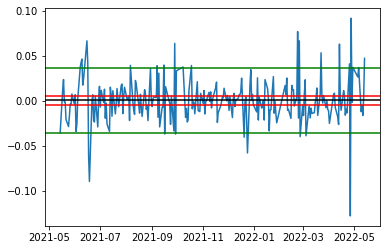

In [31]:
buy, sell, signal, name = pair_trade(x,1.5,0.2)

In [32]:
name[0]

'000096.SZ'

In [33]:
a = tuple(zip(buy,sell,signal))

In [34]:
a

((Timestamp('2021-06-08 00:00:00'), Timestamp('2021-06-18 00:00:00'), 1),
 (Timestamp('2021-09-07 00:00:00'), Timestamp('2021-09-22 00:00:00'), 1),
 (Timestamp('2021-10-08 00:00:00'), Timestamp('2021-10-20 00:00:00'), 1),
 (Timestamp('2021-12-24 00:00:00'), Timestamp('2021-12-29 00:00:00'), -1),
 (Timestamp('2022-02-24 00:00:00'), Timestamp('2022-03-15 00:00:00'), 1),
 (Timestamp('2022-04-13 00:00:00'), Timestamp('2022-04-14 00:00:00'), 1),
 (Timestamp('2022-04-27 00:00:00'), Timestamp('2022-04-28 00:00:00'), 1),
 (Timestamp('2022-05-06 00:00:00'), Timestamp('2022-05-12 00:00:00'), 1))

In [37]:
y=x['000096.SZ']-x['000501.SZ']
y

date
2021-05-14   -0.035531
2021-05-17    0.011969
2021-05-18    0.023811
2021-05-19   -0.001201
2021-05-20   -0.001246
                ...   
2022-05-09   -0.012025
2022-05-10   -0.005282
2022-05-11   -0.016239
2022-05-12    0.004644
2022-05-13    0.047348
Length: 242, dtype: float64

In [51]:
y.loc['2021-05-14']

-0.0355309887222649

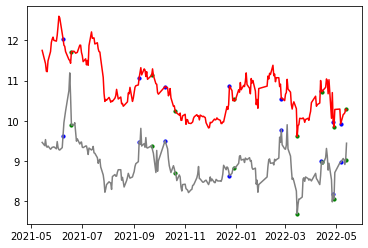

date
2021-05-14   -0.035531
2021-05-17    0.011969
2021-05-18    0.023811
2021-05-19   -0.001201
2021-05-20   -0.001246
                ...   
2022-05-09   -0.012025
2022-05-10   -0.005282
2022-05-11   -0.016239
2022-05-12    0.004644
2022-05-13    0.047348
Length: 242, dtype: float64


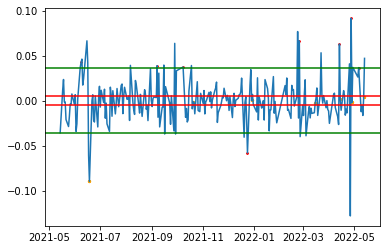

[-53.577034668101874,
 15.968577407293083,
 28.910987145282775,
 52.40296281121357,
 125.62440031401718,
 -1.678350622138396,
 1.6487651448836687,
 29.485887096774263]

In [56]:
def back(stock, op, name_list, t_buy, t_sell, init_money):
    first = name_list[0]
    second = name_list[1]
    profit_list = []

    x_buy_list = []
    y_buy_list = []
    x_sell_list = []
    y_sell_list = []

    for i in range(len(op)):
        buy_date = op[i][0]
        sell_date = op[i][1]
        opt = op[i][2]

        first_buy = stock.loc[(stock['date'] == buy_date) & (stock['code'] == first)]['price'].iloc[0]
        first_sell = stock.loc[(stock['date'] == sell_date) & (stock['code'] == first)]['price'].iloc[0]
        second_buy = stock.loc[(stock['date'] == buy_date) & (stock['code'] == second)]['price'].iloc[0]
        second_sell = stock.loc[(stock['date'] == sell_date) & (stock['code'] == second)]['price'].iloc[0]

        first_stock = init_money / first_buy
        second_stock = init_money / second_buy

        profit = - opt * (first_sell * first_stock) + opt * (second_sell * second_stock)
        profit_list.append(profit)

        x_buy_list.append(buy_date)
        y_buy_list.append(first_buy)
        x_buy_list.append(buy_date)
        y_buy_list.append(second_buy)
        x_sell_list.append(sell_date)
        y_sell_list.append(first_sell)
        x_sell_list.append(sell_date)
        y_sell_list.append(second_sell)

    #plt.subplot(2,1,1)
    plt.plot(stock['date'].unique(), stock.loc[stock['code'] == first]['price'],color='grey')
    plt.plot(stock['date'].unique(), stock.loc[stock['code'] == second]['price'],color='red')
    plt.scatter(x_buy_list, y_buy_list, s=10, c='blue')  # stroke, colour
    plt.scatter(x_sell_list, y_sell_list, s=10, c='green')

    plt.show()

    #plt.subplot(2,1,2)

    s = stock.pivot_table(index='date',columns='code',values='standard')

    price = s[first] - s[second]
    plt.plot(price)

    mu = np.mean(price)
    sigma = np.std(price)

    #plt.axhline(y=mu,color='black')
    plt.axhline(y=mu + t_buy*sigma,color='green')
    plt.axhline(y=mu-t_buy*sigma,color='green')
    plt.axhline(y=mu+t_sell*sigma,color='red')
    plt.axhline(y=mu-t_sell*sigma,color='red')

    print(price)

    plt.scatter(x_buy_list, [price.loc[i] for i in x_buy_list], s=2, c='red')
    plt.scatter(x_sell_list, [price.loc[i] for i in x_sell_list], s=5, c='orange')

    plt.show()

    return profit_list

back(df, a, name, 1.5, 0.2, 1000)

In [47]:
df

,date,code,price,price_before,standard
0,2021-05-14,000001.SZ,23.32,22.89,1.018785
1,2021-05-17,000001.SZ,23.60,23.32,1.012007
2,2021-05-18,000001.SZ,23.90,23.60,1.012712
3,2021-05-19,000001.SZ,23.60,23.90,0.987448
4,2021-05-20,000001.SZ,23.82,23.60,1.009322
...,...,...,...,...,...
24195,2022-05-09,000503.SZ,8.70,8.61,1.010453
24196,2022-05-10,000503.SZ,8.68,8.70,0.997701
24197,2022-05-11,000503.SZ,8.65,8.68,0.996544
24198,2022-05-12,000503.SZ,8.65,8.65,1.000000
